In [1]:
# Load libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import set_option
set_option('display.max_columns', 500)
set_option('display.max_rows', 500)
set_option('precision', 3)
from boruta import BorutaPy
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score,roc_curve,f1_score,precision_score,recall_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import SCORERS
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")



Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of
dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

Data

The data & attributes information for this project is available at https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

Attribute Information:
    
Matrix column entries (attributes):
    
name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency
    
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
    
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
    
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation



## -------Parkinson Data Prediction-------

<br> The First part of notebook deals with checking out </br> 
1. Nunique
2. Duplicated rows


<br> Also the Second part of notebook deals with  </br> 
1. EDA
2. Feature Selection  using Mutual Info Classification
3. preprocessing like RobustScaler not require for all ensemble Algorithms

<br> Finally the Third part of notebook deals with training/prediction </br> 
For this prediction, we will try out the following ensemble algorithm

1. AdaBoost Classifier
2. ExtraTrees Classifier
3. Random Forest Classifier
4. Gradient Boosting Classifier
5. Light GradientBoosting Classifier
6. CatBoost Classifier

In [2]:
#import dataset
df=pd.read_csv('Parkinson_disease.csv')


In [3]:
# view dataset
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.008,7.000e-05,0.004,0.006,0.011,0.044,0.426,0.022,0.031,0.030,0.065,0.022,21.033,1,0.415,0.815,-4.813,0.266,2.301,0.285
1,phon_R01_S01_2,122.400,148.650,113.819,0.010,8.000e-05,0.005,0.007,0.014,0.061,0.626,0.031,0.045,0.044,0.094,0.019,19.085,1,0.458,0.820,-4.075,0.336,2.487,0.369
2,phon_R01_S01_3,116.682,131.111,111.555,0.011,9.000e-05,0.005,0.008,0.016,0.052,0.482,0.028,0.039,0.036,0.083,0.013,20.651,1,0.430,0.825,-4.443,0.311,2.342,0.333
3,phon_R01_S01_4,116.676,137.871,111.366,0.010,9.000e-05,0.005,0.007,0.015,0.055,0.517,0.029,0.040,0.038,0.088,0.014,20.644,1,0.435,0.819,-4.118,0.334,2.406,0.369
4,phon_R01_S01_5,116.014,141.781,110.655,0.013,1.100e-04,0.007,0.009,0.020,0.064,0.584,0.035,0.048,0.045,0.105,0.018,19.649,1,0.417,0.823,-3.748,0.235,2.332,0.410


In [4]:
# view of feature columns
print("dataset columns name :",df.columns)

# move target to the last columns
df=df[['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE','status']]
df.head()

dataset columns name : Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.008,7.000e-05,0.004,0.006,0.011,0.044,0.426,0.022,0.031,0.030,0.065,0.022,21.033,0.415,0.815,-4.813,0.266,2.301,0.285,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.010,8.000e-05,0.005,0.007,0.014,0.061,0.626,0.031,0.045,0.044,0.094,0.019,19.085,0.458,0.820,-4.075,0.336,2.487,0.369,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.011,9.000e-05,0.005,0.008,0.016,0.052,0.482,0.028,0.039,0.036,0.083,0.013,20.651,0.430,0.825,-4.443,0.311,2.342,0.333,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.010,9.000e-05,0.005,0.007,0.015,0.055,0.517,0.029,0.040,0.038,0.088,0.014,20.644,0.435,0.819,-4.118,0.334,2.406,0.369,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.013,1.100e-04,0.007,0.009,0.020,0.064,0.584,0.035,0.048,0.045,0.105,0.018,19.649,0.417,0.823,-3.748,0.235,2.332,0.410,1


In [5]:
# shape
print("shape of dataset",df.shape)


shape of dataset (195, 24)


In [6]:
#dataset info
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
# descriptions, change precision to 3 places
set_option('precision', 2)
df.describe()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.00,195.00,195.00,1.95e+02,1.95e+02,1.95e+02,1.95e+02,1.95e+02,1.95e+02,195.00,1.95e+02,1.95e+02,1.95e+02,195.00,1.95e+02,195.00,195.00,195.00,195.00,1.95e+02,195.00,195.00,195.00
mean,154.23,197.10,116.32,6.22e-03,4.40e-05,3.31e-03,3.45e-03,9.92e-03,2.97e-02,0.28,1.57e-02,1.79e-02,2.41e-02,0.05,2.48e-02,21.89,0.50,0.72,-5.68,2.27e-01,2.38,0.21,0.75
std,41.39,91.49,43.52,4.85e-03,3.48e-05,2.97e-03,2.76e-03,8.90e-03,1.89e-02,0.19,1.02e-02,1.20e-02,1.69e-02,0.03,4.04e-02,4.43,0.10,0.06,1.09,8.34e-02,0.38,0.09,0.43
min,88.33,102.14,65.48,1.68e-03,7.00e-06,6.80e-04,9.20e-04,2.04e-03,9.54e-03,0.09,4.55e-03,5.70e-03,7.19e-03,0.01,6.50e-04,8.44,0.26,0.57,-7.96,6.27e-03,1.42,0.04,0.00
25%,117.57,134.86,84.29,3.46e-03,2.00e-05,1.66e-03,1.86e-03,4.98e-03,1.65e-02,0.15,8.25e-03,9.58e-03,1.31e-02,0.02,5.92e-03,19.20,0.42,0.67,-6.45,1.74e-01,2.10,0.14,1.00
50%,148.79,175.83,104.31,4.94e-03,3.00e-05,2.50e-03,2.69e-03,7.49e-03,2.30e-02,0.22,1.28e-02,1.35e-02,1.83e-02,0.04,1.17e-02,22.09,0.50,0.72,-5.72,2.19e-01,2.36,0.19,1.00
75%,182.77,224.21,140.02,7.37e-03,6.00e-05,3.83e-03,3.96e-03,1.15e-02,3.79e-02,0.35,2.03e-02,2.24e-02,2.94e-02,0.06,2.56e-02,25.08,0.59,0.76,-5.05,2.79e-01,2.64,0.25,1.00
max,260.11,592.03,239.17,3.32e-02,2.60e-04,2.14e-02,1.96e-02,6.43e-02,1.19e-01,1.30,5.65e-02,7.94e-02,1.38e-01,0.17,3.15e-01,33.05,0.69,0.83,-2.43,4.50e-01,3.67,0.53,1.00


In [8]:
# descriptions, change precision to 3 places
set_option('precision', 3)
df.describe(include="object")


,name
count,195
unique,195
top,phon_R01_S34_6
freq,1


In [9]:
# class distribution
print(df.groupby('status').size())

status
0     48
1    147
dtype: int64


In [10]:
# class distribution in percentage
print(df.groupby('status').size()/len(df))

status
0    0.246
1    0.754
dtype: float64


AxesSubplot(0.260833,0.125;0.503333x0.755)


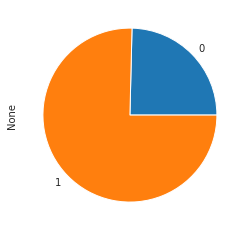

In [11]:
# class distribution in pie chart
print(df.groupby('status').size().plot.pie())

*** it show a slightly imbalanced classification *** .

*** need to change the class of the target ***

In [12]:
#encode the target
df["status"]=df["status"].map({0 :1,1 :0})
# class distribution
print(df.groupby('status').size())

status
0    147
1     48
dtype: int64


In [13]:
# FEATURE ENGINEERING

In [14]:
# CHECKING OF MISSING VALUES
print("Total missing values of each columns")
print(df.isnull().sum())


Total missing values of each columns
name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64


In [15]:
# summarize the number of unique values in each column
print(df.nunique())

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
status                2
dtype: int64


In [16]:
#drop Nunique columns
df.drop("name",axis=1,inplace=True)

In [17]:
# locate rows of duplicate data
df.duplicated().any()

False

Visualization before preprocessing

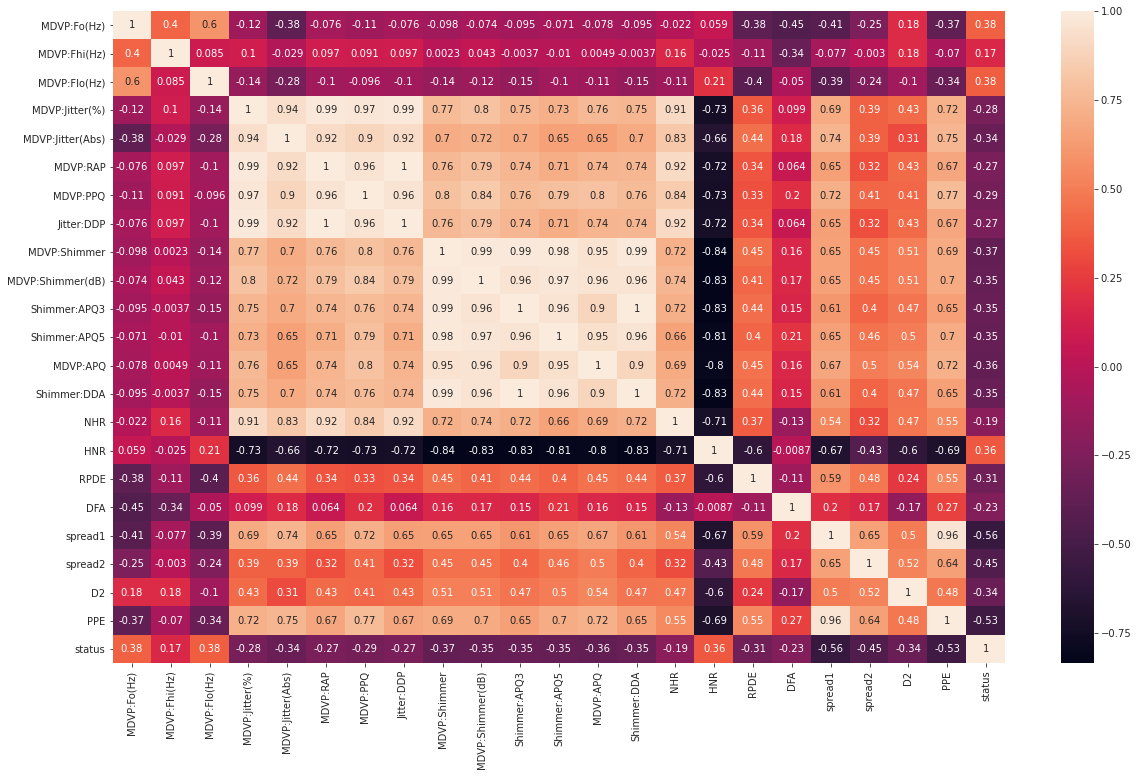

In [18]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

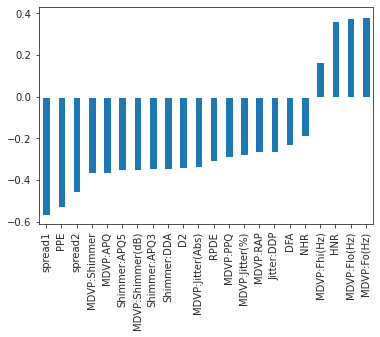

In [19]:
# plot correlation
df.corr()['status'][:-1].sort_values().plot(kind='bar')
plt.show()

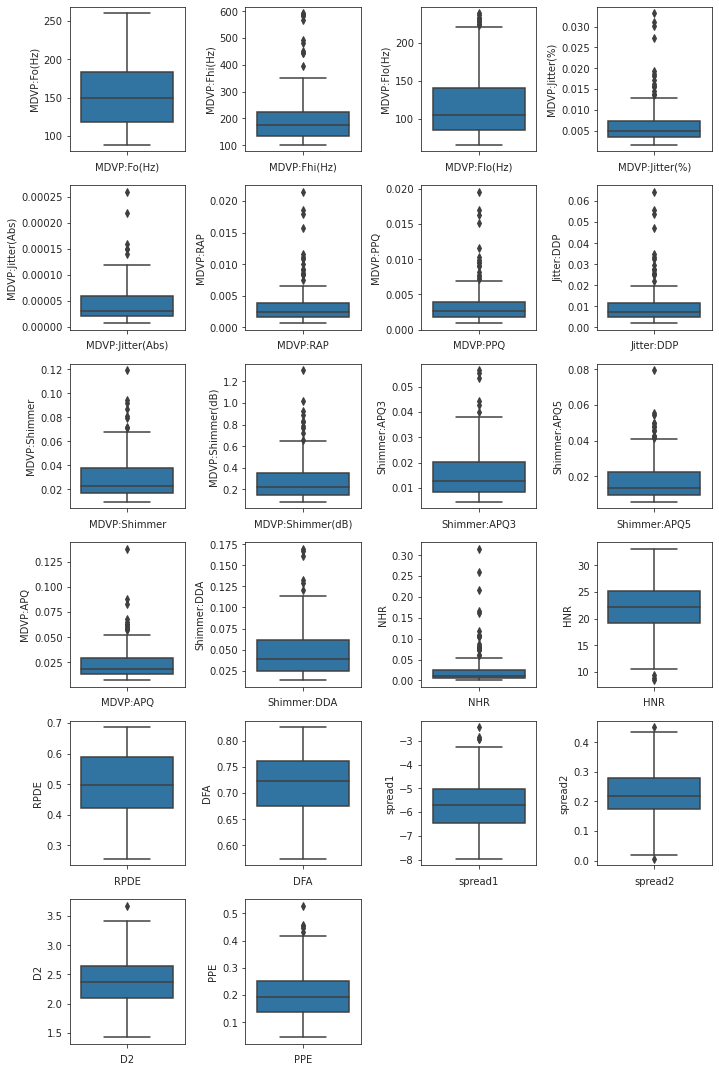

In [20]:
#Boxplot for checking of outliers
plt.figure(figsize=(10,15))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber < 23:
        plt.subplot(6,4,plotnumber)
        sns.boxplot(df[col],orient='v')
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


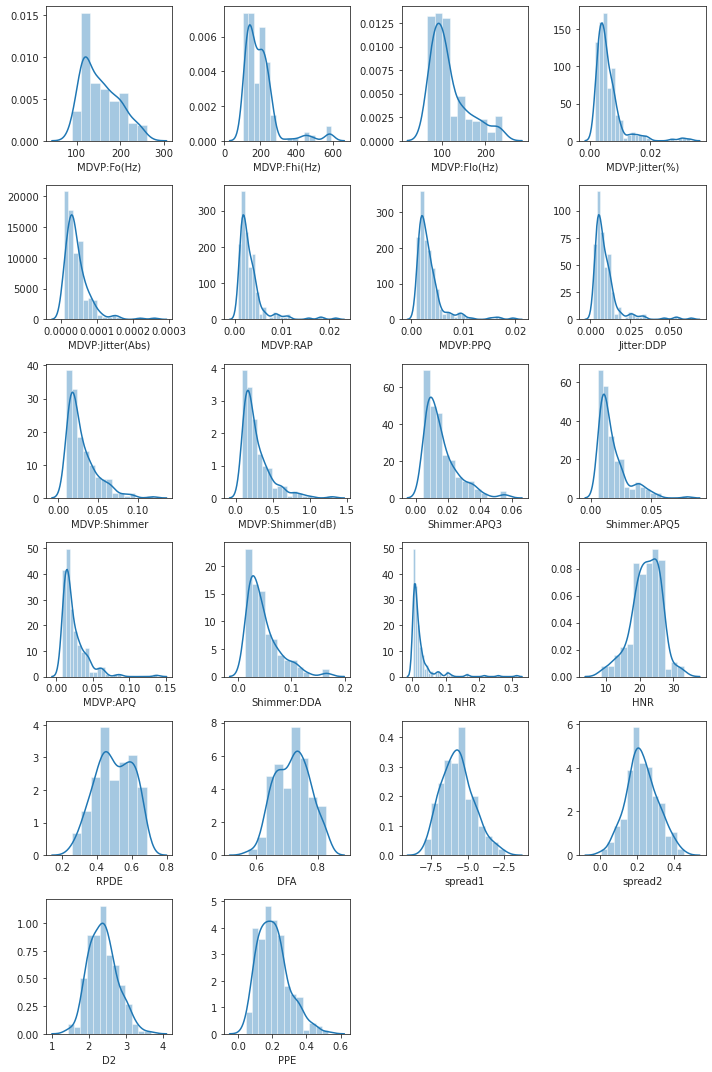

In [21]:
# histogram plot(for checking of skew,gaussian distribution)
plt.figure(figsize=(10,15))
plotnumber = 1

for col in df.columns[:-1]:
    if plotnumber < 23:
        plt.subplot(6,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnumber +=1
plt.tight_layout()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  RPDE              195 non-null    float64
 1

In [23]:
print('shape of data before outliers',df.shape)

shape of data before outliers (195, 23)


In [24]:
# Remove Outliers using zscore
from scipy import stats
import numpy as np

z=np.abs(stats.zscore(df))
df=df[(z<3).all(axis=1)]

In [25]:
print('shape of data after outliers',df.shape)

shape of data after outliers (181, 23)


# FEATURE SELECTION WITH BORUTA

In [26]:
X = df.iloc[:,0:22] #independent columns
Y = df.iloc[:,-1] #target column 

# Test options and evaluation metric
validation_size = 0.30
seed = 42
shuffle=True

num_folds = 10
scoring = 'roc_auc'

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed,shuffle=shuffle,stratify=Y)

#shape of the training and validation feature
X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape

((126, 22), (55, 22), (126,), (55,))

In [27]:
#Borupy 2

from BorutaShap import BorutaShap
model = RandomForestClassifier(n_estimators=500, max_depth=5, random_state=42)
# Creates a BorutaShap selector for regression
selector = BorutaShap(model=model,importance_measure = 'shap', classification = True)


In [28]:
# Fits the selector
selector.fit(X = X_train, y = Y_train, n_trials = 100, random_state=42,sample = True, verbose = True)



14 attributes confirmed important: ['MDVP:PPQ', 'PPE', 'DFA', 'MDVP:Fo(Hz)', 'Shimmer:APQ5', 'spread2', 'MDVP:Flo(Hz)', 'NHR', 'Jitter:DDP', 'MDVP:APQ', 'spread1', 'MDVP:Shimmer', 'MDVP:Fhi(Hz)', 'MDVP:RAP']
5 attributes confirmed unimportant: ['MDVP:Jitter(Abs)', 'RPDE', 'Shimmer:APQ3', 'Shimmer:DDA', 'MDVP:Jitter(%)']
3 tentative attributes remains: ['HNR', 'D2', 'MDVP:Shimmer(dB)']


In [29]:
# Display features to be removed
features_to_remove = selector.features_to_remove
print(features_to_remove)
# Removes them
X_train = X_train.drop(columns = features_to_remove)
X_validation = X_validation.drop(columns = features_to_remove)

print('X_train',X_train.shape)
print('X_validation',X_validation.shape)
print('features_to_remove',features_to_remove.shape)


['MDVP:Jitter(%)' 'MDVP:Jitter(Abs)' 'Shimmer:APQ3' 'Shimmer:DDA' 'RPDE']
X_train (126, 17)
X_validation (55, 17)
features_to_remove (5,)


In [30]:
def print_evaluate(true, predicted):
    train_accuracy=round(model.score(rescaledX, Y_train),3)
    test_accuracy=round(model.score(rescaledValidationX, Y_validation),3)    
    accuracy_score = metrics.accuracy_score(true, predicted)
    roc_auc_score = metrics.roc_auc_score(true, predicted)
    precision_score = metrics.precision_score(true, predicted)
    recall_score = metrics.recall_score(true, predicted)
    f1_score = metrics.f1_score(true, predicted)
 
    
    print("----------------------------------")
    print('accuracy score:', accuracy_score)
    print("----------------------------------")
    print('roc auc score:', roc_auc_score)
    print("----------------------------------")
    print('precision score', precision_score)
    print("----------------------------------")
    print('recall score', recall_score)
    print("----------------------------------")
    print('f1 score:', f1_score)
    print("----------------------------------")
    print('')
   
    
def evaluate(true, predicted):
    train_accuracy=round(model.score(rescaledX, Y_train),3)
    test_accuracy=round(model.score(rescaledValidationX, Y_validation),3)     
    accuracy_score = metrics.accuracy_score(true, predicted)
    roc_auc_score = metrics.roc_auc_score(true, predicted)
    precision_score = metrics.precision_score(true, predicted)
    recall_score = metrics.recall_score(true, predicted)
    f1_score = metrics.f1_score(true, predicted)
    return train_accuracy,test_accuracy,accuracy_score, roc_auc_score, precision_score, recall_score , f1_score 

In [31]:
# Spot-Check Algorithms
models = []

#Standard Scale Algorithms(linear and non-linear algorithms)
models.append(('Standard-Scaled-LR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
models.append(('Standard-Scaled-LDA', Pipeline([('Scaler', StandardScaler()),('LDA',LinearDiscriminantAnalysis())])))
models.append(('Standard-Scaled-KNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))
models.append(('Standard-Scaled-CART', Pipeline([('Scaler', StandardScaler()),('CART',DecisionTreeClassifier())])))
models.append(('Standard-Scaled-NB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
models.append(('Standard-Scaled-SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))

#Standard Scale Algorithms(Ensemble algorithms)
models.append(('Standard-Scaled-AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
models.append(('Standard-Scaled-GBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
models.append(('Standard-Scaled-RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
models.append(('Standard-Scaled-ET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
models.append(('Standard-Scaled-LGBMC', Pipeline([('Scaler', StandardScaler()),('LGBMC', LGBMClassifier())])))
models.append(('Standard-Scaled-XGBC', Pipeline([('Scaler', StandardScaler()),('XGBC', XGBClassifier(verbosity=0))])))
models.append(('Standard-Scaled-Cat', Pipeline([('Scaler', StandardScaler()),('Cat', CatBoostClassifier(verbose=False))])))


results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


Standard-Scaled-LR: 0.903333 (0.047753)
Standard-Scaled-LDA: 0.869815 (0.061653)
Standard-Scaled-KNN: 0.980370 (0.015498)
Standard-Scaled-CART: 0.845556 (0.088699)
Standard-Scaled-NB: 0.881481 (0.076300)
Standard-Scaled-SVM: 0.920185 (0.082112)
Standard-Scaled-AB: 0.922963 (0.113648)
Standard-Scaled-GBM: 0.928333 (0.066088)
Standard-Scaled-RF: 0.938241 (0.058317)
Standard-Scaled-ET: 0.961481 (0.039482)
Standard-Scaled-LGBMC: 0.941667 (0.045807)
Standard-Scaled-XGBC: 0.941481 (0.056366)
Standard-Scaled-Cat: 0.959074 (0.034906)


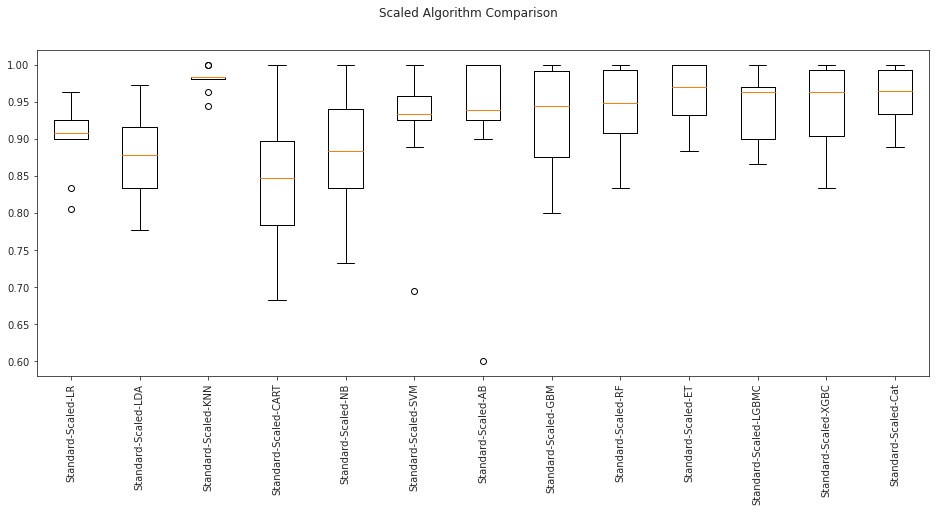

In [32]:
# Compare Algorithms
fig = plt.figure(figsize=(16,6))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

# ***Box-plot Diagram***
* ****Linear Algorithms***. 
1. Logistic Regression
2. Linear Discriminant Analysis

* ****Non Linear Algorithms***. 
3. KNeighbors Classifier
4. DecisionTree Classifier
5. GaussianNB
6. SVC

* ****Ensemble Algorithms***. 
1. AdaBoost Classifier
2. ExtraTrees Classifier
3. Random Forest Classifier
4. Gradient Boosting Classifier
5. Light GradientBoosting Classifier
6. CatBoost Classifier

* The Boxplot above show outliers in both Linear and Non-linear Algorithms except KNN
and also in two of ensemble algorithms(Extra-Trees and Catboost)

* All ALgorithm show a promising and high mean score (roc_auc) above 90% except 
Cart(Decision-Tree) of 76%

* Hence Ensemble algorithm should be use for my predictive modelling

* Any preprocessing can be use.

In [33]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

neighbors = range(1,21)
leaf_size=range(1,21)
weights=['uniform', 'distance']

param_grid = dict(n_neighbors=neighbors,leaf_size=leaf_size,weights=weights)
model = KNeighborsClassifier()
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_KNeighborsClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_KNeighborsClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- KNeighbors Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsClassifier(**grid_KNeighborsClassifier.best_params_)
model.fit(rescaledX, Y_train)

#Prediction on test/train sets
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)

print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')

train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))


-----------------------------------------------------------
Model : -------- KNeighbors Classifier -------- 
-----------------------------------------------------------
Best: 0.993519 using {'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.9090909090909091
----------------------------------
roc auc score: 0.89198606271777
----------------------------------
precision score 0.8
----------------------------------
recall score 0.8571428571428571
----------------------------------
f1 score: 0.8275862068965518
----------------------------------

confusion_matrix report :

[[38  3]
 [ 2 12]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        41
           1       0.80      0.86      0.83        14

    accuracy                           

In [34]:
results_df = pd.DataFrame(data=[["KNeighbors Classifier", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'train_accuracy','test_accuracy','accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
0,KNeighbors Classifier,1.0,0.909,0.909,0.892,0.8,0.857,0.828


In [35]:
# Tune scaled Logistic Regression
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1,0.2, 0.3,0.4, 0.5,0.6, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0, 1, 3, 5, 7, 9,11]
solver_values = ['newton-cg', 'lbfgs', 'liblinear']
penalty=['l1','l2']

param_grid = dict(C=c_values, solver=solver_values,penalty=penalty)
model = LogisticRegression(random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_LogisticRegression = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_LogisticRegression.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- Logistic Regression -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LogisticRegression(**grid_LogisticRegression.best_params_)
model.fit(rescaledX, Y_train)

#Prediction on test/train sets
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)


print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')

train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- Logistic Regression -------- 
-----------------------------------------------------------
Best: 0.923148 using {'C': 1.5, 'penalty': 'l1', 'solver': 'liblinear'}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.7818181818181819
----------------------------------
roc auc score: 0.6890243902439025
----------------------------------
precision score 0.5833333333333334
----------------------------------
recall score 0.5
----------------------------------
f1 score: 0.5384615384615384
----------------------------------

confusion_matrix report :

[[36  5]
 [ 7  7]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.58      0.50      0.54        14

    accuracy                           0.78   

In [36]:
results_df_1 = pd.DataFrame(data=[["LogisticRegression", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model','train_accuracy','test_accuracy', 'accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_1, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
0,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
1,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


In [37]:
# Tune scaled ExtraTreesClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,100,200,500]
min_samples_leaf= [1,3,5,7,9]
criterion = ["gini", "entropy"]

param_grid = dict(n_estimators=n_estimators,min_samples_leaf=min_samples_leaf,criterion=criterion)
model = ExtraTreesClassifier(random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_ExtraTreesClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_ExtraTreesClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- ExtraTrees Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(random_state=seed,**grid_ExtraTreesClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)

print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')

train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- ExtraTrees Classifier -------- 
-----------------------------------------------------------
Best: 0.979259 using {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 50}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.9272727272727272
----------------------------------
roc auc score: 0.8571428571428572
----------------------------------
precision score 1.0
----------------------------------
recall score 0.7142857142857143
----------------------------------
f1 score: 0.8333333333333333
----------------------------------

confusion_matrix report :

[[41  0]
 [ 4 10]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.71      0.83        14

    accuracy               

In [38]:
results_df_2 = pd.DataFrame(data=[["ExtraTreesClassifier", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model','train_accuracy','test_accuracy', 'accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_2, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
0,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
2,ExtraTreesClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
1,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


In [39]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,100]
max_depth=[None,1,3,5,7,9]
max_features = ['auto', 'sqrt', 'log2']
    
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth,max_features=max_features)
model = model = GradientBoostingClassifier(random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_GradientBoostingClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_GradientBoostingClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- GradientBoostingClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = ExtraTreesClassifier(random_state=seed,**grid_GradientBoostingClassifier.best_params_)
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)


print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')



train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- GradientBoostingClassifier -------- 
-----------------------------------------------------------
Best: 0.965926 using {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.9272727272727272
----------------------------------
roc auc score: 0.8571428571428572
----------------------------------
precision score 1.0
----------------------------------
recall score 0.7142857142857143
----------------------------------
f1 score: 0.8333333333333333
----------------------------------

confusion_matrix report :

[[41  0]
 [ 4 10]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        41
           1       1.00      0.71      0.83        14

    accuracy              

In [40]:
results_df_3 = pd.DataFrame(data=[["GradientBoostingClassifier", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'train_accuracy','test_accuracy','accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_3, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
0,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
1,ExtraTreesClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
3,GradientBoostingClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
2,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


In [41]:
# Tune scaled Randomforest
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

criterion=['gini','entropy']
min_samples_leaf= [1,3,5,7]
n_estimators=[10,50,100,200,500]

param_grid = dict(criterion=criterion, min_samples_leaf=min_samples_leaf,n_estimators=n_estimators)
model = RandomForestClassifier(random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_RandomForestClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_RandomForestClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- RandomForestClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier(random_state=seed,**grid_RandomForestClassifier.best_params_)
model.fit(rescaledX, Y_train)

#Prediction on test/train sets
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)


print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')


train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- RandomForestClassifier -------- 
-----------------------------------------------------------
Best: 0.961852 using {'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 200}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.9454545454545454
----------------------------------
roc auc score: 0.8928571428571428
----------------------------------
precision score 1.0
----------------------------------
recall score 0.7857142857142857
----------------------------------
f1 score: 0.88
----------------------------------

confusion_matrix report :

[[41  0]
 [ 3 11]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        41
           1       1.00      0.79      0.88        14

    accuracy                           

In [42]:
results_df_4 = pd.DataFrame(data=[["RandomForestClassifier", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'train_accuracy','test_accuracy','accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_4, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
4,RandomForestClassifier,1.000,0.945,0.945,0.893,1.000,0.786,0.880
0,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
1,ExtraTreesClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
2,GradientBoostingClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
3,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


In [43]:
# Tune scaled XGBClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,150,200,300,500,1000]
max_depth=[None,1,2,3,5,7]

param_grid = dict(n_estimators=n_estimators,max_depth=max_depth)
model = XGBClassifier(random_state=seed,verbosity=0)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_XGBClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_XGBClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- Extreme GradientBoosting Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = XGBClassifier(random_state=seed,**grid_XGBClassifier.best_params_,verbosity=0)
model.fit(rescaledX, Y_train)

#Prediction on test/train sets
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)


print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')

train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- Extreme GradientBoosting Classifier -------- 
-----------------------------------------------------------
Best: 0.965926 using {'max_depth': 1, 'n_estimators': 300}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.8727272727272727
----------------------------------
roc auc score: 0.7970383275261324
----------------------------------
precision score 0.8181818181818182
----------------------------------
recall score 0.6428571428571429
----------------------------------
f1 score: 0.7200000000000001
----------------------------------

confusion_matrix report :

[[39  2]
 [ 5  9]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        41
           1       0.82      0.64      0.72        14

    accuracy                

In [44]:
results_df_5 = pd.DataFrame(data=[["XGBClassifier", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model','train_accuracy','test_accuracy' ,'accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_5, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
0,RandomForestClassifier,1.000,0.945,0.945,0.893,1.000,0.786,0.880
1,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
2,ExtraTreesClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
3,GradientBoostingClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
5,XGBClassifier,1.000,0.873,0.873,0.797,0.818,0.643,0.720
4,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


In [45]:
#prevent CatBoostClassifier to throw out error
class CatBoostClassifier(CatBoostClassifier):
    def _get_tags(self):
        return {'pairwise' : False}

In [46]:
# Tune scaled CatBoostClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
learning_rate=[0.1,0.5,0.01,0.05,1]

param_grid = dict(learning_rate=learning_rate)
model = CatBoostClassifier(random_state=seed,verbose=False)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_CatBoostClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_CatBoostClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- CatBoost Classifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = CatBoostClassifier(random_state=seed,**grid_CatBoostClassifier.best_params_,verbose=False)
model.fit(rescaledX, Y_train)

#Prediction on test/train sets
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)

print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')


train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- CatBoost Classifier -------- 
-----------------------------------------------------------
Best: 0.964630 using {'learning_rate': 0.01}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.9090909090909091
----------------------------------
roc auc score: 0.8214285714285714
----------------------------------
precision score 1.0
----------------------------------
recall score 0.6428571428571429
----------------------------------
f1 score: 0.782608695652174
----------------------------------

confusion_matrix report :

[[41  0]
 [ 5  9]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        41
           1       1.00      0.64      0.78        14

    accuracy                           0.91        55
   macro avg       0

In [47]:
results_df_6 = pd.DataFrame(data=[["CatBoostClassifier", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'train_accuracy','test_accuracy','accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_6, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
0,RandomForestClassifier,1.000,0.945,0.945,0.893,1.000,0.786,0.880
1,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
2,ExtraTreesClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
3,GradientBoostingClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
6,CatBoostClassifier,1.000,0.909,0.909,0.821,1.000,0.643,0.783
4,XGBClassifier,1.000,0.873,0.873,0.797,0.818,0.643,0.720
5,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


In [48]:
# Tune scaled LGBMClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[25,50,500,1000]
boosting_type=['gbdt','dart','goss','rf']

param_grid = dict(n_estimators=n_estimators,boosting_type=boosting_type)
model = LGBMClassifier(random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_LGBMClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_LGBMClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- LGBMClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = LGBMClassifier(random_state=seed,**grid_LGBMClassifier.best_params_)
model.fit(rescaledX, Y_train)

#Prediction on test/train sets
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)


print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')

train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- LGBMClassifier -------- 
-----------------------------------------------------------
Best: 0.954259 using {'boosting_type': 'gbdt', 'n_estimators': 500}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.9636363636363636
----------------------------------
roc auc score: 0.9285714285714286
----------------------------------
precision score 1.0
----------------------------------
recall score 0.8571428571428571
----------------------------------
f1 score: 0.923076923076923
----------------------------------

confusion_matrix report :

[[41  0]
 [ 2 12]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.86      0.92        14

    accuracy                           0.96        55
  

In [49]:
results_df_6 = pd.DataFrame(data=[["LGBMClassifier", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'train_accuracy','test_accuracy','accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_6, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
7,LGBMClassifier,1.000,0.964,0.964,0.929,1.000,0.857,0.923
0,RandomForestClassifier,1.000,0.945,0.945,0.893,1.000,0.786,0.880
1,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
2,ExtraTreesClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
3,GradientBoostingClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
4,CatBoostClassifier,1.000,0.909,0.909,0.821,1.000,0.643,0.783
5,XGBClassifier,1.000,0.873,0.873,0.797,0.818,0.643,0.720
6,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


In [50]:
# Tune scaled AdaBoostClassifier
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

n_estimators=[50,100,150,200]
learning_rate=[0.1,0.01,0.001,1.0]


param_grid = dict(n_estimators=n_estimators,learning_rate=learning_rate)
model = AdaBoostClassifier(random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_AdaBoostClassifier = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_AdaBoostClassifier.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- AdaBoostClassifier -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = AdaBoostClassifier(random_state=seed,**grid_AdaBoostClassifier.best_params_)
model.fit(rescaledX, Y_train)

#Prediction on test/train sets
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)


print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')

train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- AdaBoostClassifier -------- 
-----------------------------------------------------------
Best: 0.925556 using {'learning_rate': 0.1, 'n_estimators': 150}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.8909090909090909
----------------------------------
roc auc score: 0.8562717770034843
----------------------------------
precision score 0.7857142857142857
----------------------------------
recall score 0.7857142857142857
----------------------------------
f1 score: 0.7857142857142857
----------------------------------

confusion_matrix report :

[[38  3]
 [ 3 11]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        41
           1       0.79      0.79      0.79        14

    accuracy                           

In [51]:
results_df_7 = pd.DataFrame(data=[["AdaBoostClassifier", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'train_accuracy','test_accuracy','accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_7, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
0,LGBMClassifier,1.000,0.964,0.964,0.929,1.000,0.857,0.923
1,RandomForestClassifier,1.000,0.945,0.945,0.893,1.000,0.786,0.880
2,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
3,ExtraTreesClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
4,GradientBoostingClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
8,AdaBoostClassifier,1.000,0.891,0.891,0.856,0.786,0.786,0.786
5,CatBoostClassifier,1.000,0.909,0.909,0.821,1.000,0.643,0.783
6,XGBClassifier,1.000,0.873,0.873,0.797,0.818,0.643,0.720
7,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


In [52]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0,3.0,5.0,7.0,9.0,21.0,27.0,30.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
class_weight=[None,'balanced']

param_grid = dict(C=c_values, kernel=kernel_values,class_weight=class_weight)
model = SVC(random_state=seed)
kfold = StratifiedKFold(n_splits=num_folds, random_state=seed,shuffle=shuffle)
grid_SVC = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid_SVC.fit(rescaledX, Y_train)

print("-----------------------------------------------------------")
print("Model : -------- SVC -------- ")
print("-----------------------------------------------------------")
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("-----------------------------------------------------------")

# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(random_state=seed,**grid_SVC.best_params_)
model.fit(rescaledX, Y_train)

#Prediction on test/train sets
rescaledValidationX = scaler.transform(X_validation)
test_pred = model.predict(rescaledValidationX)


print('')
print('TEST SET EVALUATION :\n')
print_evaluate(Y_validation, test_pred)
print('confusion_matrix report :\n')
print(confusion_matrix(Y_validation, test_pred))
print("----------------------------------")
print('classification_report :\n')
print(classification_report(Y_validation, test_pred))
print("----------------------------------")
print('')

train_accuracy=print("training accuracy :",model.score(rescaledX, Y_train))
test_accuracy=print("test accuracy :",model.score(rescaledValidationX, Y_validation))

-----------------------------------------------------------
Model : -------- SVC -------- 
-----------------------------------------------------------
Best: 0.982778 using {'C': 5.0, 'class_weight': 'balanced', 'kernel': 'rbf'}
-----------------------------------------------------------

TEST SET EVALUATION :

----------------------------------
accuracy score: 0.9090909090909091
----------------------------------
roc auc score: 0.9155052264808362
----------------------------------
precision score 0.7647058823529411
----------------------------------
recall score 0.9285714285714286
----------------------------------
f1 score: 0.8387096774193549
----------------------------------

confusion_matrix report :

[[37  4]
 [ 1 13]]
----------------------------------
classification_report :

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        41
           1       0.76      0.93      0.84        14

    accuracy                           0.9

In [53]:
results_df_8 = pd.DataFrame(data=[["SVC", *evaluate(Y_validation, test_pred)]], 
                          columns=['Model', 'train_accuracy','test_accuracy','accuracy_score', 'roc_auc_score', 'precision_score', 'recall_score','f1_score'])
results_df = results_df.append(results_df_8, ignore_index=True).sort_values(by='roc_auc_score',ascending=False)
results_df

,Model,train_accuracy,test_accuracy,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score
0,LGBMClassifier,1.000,0.964,0.964,0.929,1.000,0.857,0.923
9,SVC,0.968,0.909,0.909,0.916,0.765,0.929,0.839
1,RandomForestClassifier,1.000,0.945,0.945,0.893,1.000,0.786,0.880
2,KNeighbors Classifier,1.000,0.909,0.909,0.892,0.800,0.857,0.828
3,ExtraTreesClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
4,GradientBoostingClassifier,1.000,0.927,0.927,0.857,1.000,0.714,0.833
5,AdaBoostClassifier,1.000,0.891,0.891,0.856,0.786,0.786,0.786
6,CatBoostClassifier,1.000,0.909,0.909,0.821,1.000,0.643,0.783
7,XGBClassifier,1.000,0.873,0.873,0.797,0.818,0.643,0.720
8,LogisticRegression,0.865,0.782,0.782,0.689,0.583,0.500,0.538


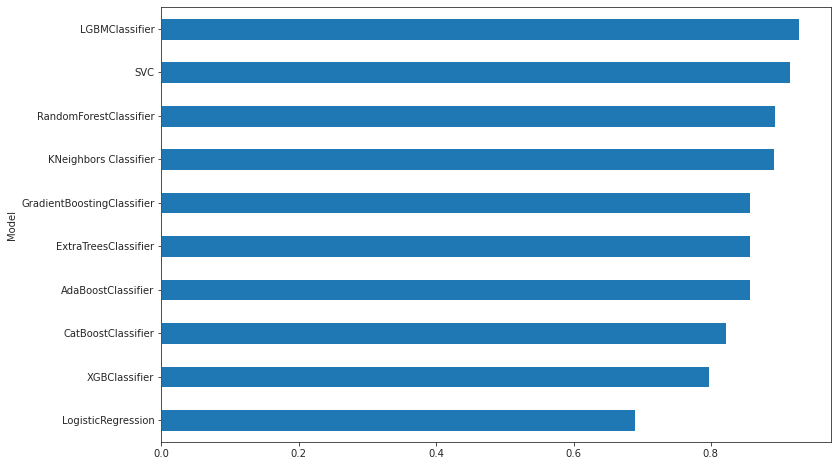

In [54]:
results_df.set_index('Model', inplace=True)
results_df['roc_auc_score'].sort_values(ascending=True).plot(kind='barh', figsize=(12, 8)) #barh stands for bar histogram 

# -------------------Conclusion-----------------
* ****Best Model*** -- LGBMClassifier(Light Gradient Boosting Classifier)
* Train_accuracy = 100%
* Test_accuracy = 96%
* Accuracy  = 96%
* ROC_AUC   = 92%
* Precision = 100%
* Recall    = 86%
* F1 score  = 92%

